In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Diabetes Dataset
source: https://www.kaggle.com/datasets/mathchi/diabetes-data-set

In [2]:
df = pd.read_csv('diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
x = df.iloc[:,0: -1].values
y = df.iloc[:,-1].values

Train-test split

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

SVM

In [13]:
from sklearn.svm import SVC

model_SVC = SVC(kernel='rbf', random_state=4)
model_SVC.fit(x_train, y_train)

y_pred_svm = model_SVC.decision_function(x_test)

Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

model_Log = LogisticRegression()
model_Log.fit(x_train, y_train)

y_pred_log = model_Log.decision_function(x_test)

Plot ROC and compute AUC

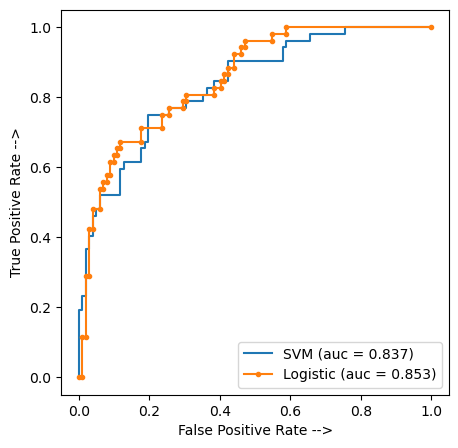

In [14]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_log)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=[5,5], dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()